In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import FunctionTransformer

In [2]:
df = pd.read_csv('./data/1000_records.csv')
df.head()

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,...,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,...,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,...,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,...,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,...,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh


Observations:

1. There are so many columns which will not be very useful for the model. Those will be removed.
2. There are categorical as well as numeric variables


In [126]:
df.columns

Index(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'Age in Company (Years)', 'Salary',
       'Last % Hike', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Password'],
      dtype='object')

Observations:
  The following columns may not contribute to the model. So will be dropped.
  
 ['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name','E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth','Weight in Kgs.', 'Date of Joining','Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'SSN', 'Phone No. ', 'User Name', 'Password']
       
Further investigation will be done on the remaining columns in the dataset.

In [127]:
data = df.drop(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name','E Mail', "Father's Name", "Mother's Name", "Mother's Maiden Name", 'Date of Birth', 'Time of Birth','Weight in Kgs.', 'Date of Joining','Month of Joining', 'Month Name of Joining', 'Short Month', 'Day of Joining', 'DOW of Joining', 'Short DOW', 'SSN', 'Phone No. ', 'User Name', 'Password'], axis=1)
data.head()

,Gender,Age in Yrs.,Quarter of Joining,Half of Joining,Year of Joining,Age in Company (Years),Salary,Last % Hike,Place Name,County,City,State,Zip,Region
0,F,45.66,Q4,H2,2010,6.61,119090,17%,Las Vegas,Clark,Las Vegas,NV,89128,West
1,M,23.76,Q2,H1,2017,0.26,117991,14%,Irons,Lake,Irons,MI,49644,Midwest
2,F,22.68,Q1,H1,2017,0.34,161045,28%,Lexington,Fayette,Lexington,KY,40501,South
3,F,41.70,Q1,H1,2003,14.43,142616,16%,Munster,Lake,Munster,IN,46321,Midwest
4,F,22.39,Q4,H2,2016,0.79,135706,11%,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West


Pushing the target variable to the end

In [128]:
target = data['Salary']
data.drop(labels=['Salary'], axis=1, inplace = True)
data.insert(13, 'Salary', target)
data.head()

,Gender,Age in Yrs.,Quarter of Joining,Half of Joining,Year of Joining,Age in Company (Years),Last % Hike,Place Name,County,City,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17%,Las Vegas,Clark,Las Vegas,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14%,Irons,Lake,Irons,MI,49644,Midwest,117991
2,F,22.68,Q1,H1,2017,0.34,28%,Lexington,Fayette,Lexington,KY,40501,South,161045
3,F,41.70,Q1,H1,2003,14.43,16%,Munster,Lake,Munster,IN,46321,Midwest,142616
4,F,22.39,Q4,H2,2016,0.79,11%,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,135706


In [129]:
data.columns


Index(['Gender', 'Age in Yrs.', 'Quarter of Joining', 'Half of Joining',
       'Year of Joining', 'Age in Company (Years)', 'Last % Hike',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'Salary'],
      dtype='object')

In [130]:
#Renaming the columns
data.rename(columns={'Age in Yrs.':'Age', 'Quarter of Joining':'Joining_quarter', 'Half of Joining':'Joining_half' ,
       'Year of Joining':'Joining_year', 'Age in Company (Years)':'Experience', 'Last % Hike':'Last_hike',
       'Place Name':'Place_name'}, inplace=True)

In [131]:
data.head()

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,Place_name,County,City,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17%,Las Vegas,Clark,Las Vegas,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14%,Irons,Lake,Irons,MI,49644,Midwest,117991
2,F,22.68,Q1,H1,2017,0.34,28%,Lexington,Fayette,Lexington,KY,40501,South,161045
3,F,41.70,Q1,H1,2003,14.43,16%,Munster,Lake,Munster,IN,46321,Midwest,142616
4,F,22.39,Q4,H2,2016,0.79,11%,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,135706


Observations:

1. It looks like Place_name and City both have the same values. So dropping Place_name
2. The Joining_year and the Experience variables might also act alike since they both answer the same question "Since when/how long has this employee been assosiated with the company". But I would like to look at the correlation between these variables before deciding if I need to drop one of them.

In [132]:
data.drop(['Place_name'], axis=1, inplace = True)

In [133]:
data.head()

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,County,City,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17%,Clark,Las Vegas,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14%,Lake,Irons,MI,49644,Midwest,117991
2,F,22.68,Q1,H1,2017,0.34,28%,Fayette,Lexington,KY,40501,South,161045
3,F,41.70,Q1,H1,2003,14.43,16%,Lake,Munster,IN,46321,Midwest,142616
4,F,22.39,Q4,H2,2016,0.79,11%,Fairbanks North Star,Fairbanks,AK,99709,West,135706


Observations:

1. The Last_hike variable needs data clean-up. Remove '%' from the values and convert the values into proportions.
2. There are categorical variables available in the dataset. If we are going to use them, we'll have to do encoding. ['Gender', 'Joining_quarter', 'Joining_half', 'Joining_year','County', 'City', 'State',
 'Zip', 'Region']

In [134]:
data.shape

(1000, 13)

Observations:

1.There are 1000 rows and 13 columns.

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1000 non-null   object 
 1   Age              1000 non-null   float64
 2   Joining_quarter  1000 non-null   object 
 3   Joining_half     1000 non-null   object 
 4   Joining_year     1000 non-null   int64  
 5   Experience       1000 non-null   float64
 6   Last_hike        1000 non-null   object 
 7   County           1000 non-null   object 
 8   City             1000 non-null   object 
 9   State            1000 non-null   object 
 10  Zip              1000 non-null   int64  
 11  Region           1000 non-null   object 
 12  Salary           1000 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 101.7+ KB


Observations:

Although Joining_year and Zip are integers, these variables can be used to group the data.

In [136]:
data.describe()

,Age,Joining_year,Experience,Zip,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.377250,2006.992000,10.093720,48698.499000,120288.528000
std,11.107729,8.565588,8.568863,27396.021481,45178.339916
min,21.040000,1980.000000,0.000000,1002.000000,40040.000000
25%,30.925000,2002.000000,3.152500,25421.750000,82122.000000
50%,40.730000,2009.000000,7.815000,47416.500000,119409.000000
75%,49.852500,2014.000000,15.465000,71101.000000,159109.000000
max,59.980000,2017.000000,37.570000,99791.000000,199943.000000


Observations:

1. The Experience variable seem to be slightly skewed.
2. The other variables seem to be close to normal distribution.

In [137]:
data.columns

Index(['Gender', 'Age', 'Joining_quarter', 'Joining_half', 'Joining_year',
       'Experience', 'Last_hike', 'County', 'City', 'State', 'Zip', 'Region',
       'Salary'],
      dtype='object')

In [138]:
data.select_dtypes(include = 'object').describe()

,Gender,Joining_quarter,Joining_half,Last_hike,County,City,State,Region
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,4,2,31,582,880,50,4
top,M,Q2,H1,16%,Jefferson,Saint Louis,PA,South
freq,509,276,519,45,15,5,62,371


Observations:

1. There are more than 100 categories in 'County ' and 'City'. This will create more features when we do encoding.
2. Since we already have 'State' and 'Region' to represent geographical details, we can safely drop 'County' and 'City'.
3. There are slightly more Male employees that Female employees.
4. Slightly more number of employees joined in the 1st half of the years than the 2nd half. Particularly in the 2nd Quarter.
5. A good number of employees are from the South region and from PA.

In [139]:
data.drop(['County','City'], axis=1,inplace=True)
data.head(2)

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17%,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14%,MI,49644,Midwest,117991


In [140]:
data.isnull().sum()

Gender             0
Age                0
Joining_quarter    0
Joining_half       0
Joining_year       0
Experience         0
Last_hike          0
State              0
Zip                0
Region             0
Salary             0
dtype: int64

Observations:

There are no missing values in the dataset.

### Data Cleaning

In [141]:
data['Last_hike'] = data['Last_hike'].apply(lambda x: x.strip('%')).astype('int64')
data.head()

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14,MI,49644,Midwest,117991
2,F,22.68,Q1,H1,2017,0.34,28,KY,40501,South,161045
3,F,41.70,Q1,H1,2003,14.43,16,IN,46321,Midwest,142616
4,F,22.39,Q4,H2,2016,0.79,11,AK,99709,West,135706


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1000 non-null   object 
 1   Age              1000 non-null   float64
 2   Joining_quarter  1000 non-null   object 
 3   Joining_half     1000 non-null   object 
 4   Joining_year     1000 non-null   int64  
 5   Experience       1000 non-null   float64
 6   Last_hike        1000 non-null   int64  
 7   State            1000 non-null   object 
 8   Zip              1000 non-null   int64  
 9   Region           1000 non-null   object 
 10  Salary           1000 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 86.1+ KB


### Univariate analysis

In [143]:
data.Last_hike.unique()

array([17, 14, 28, 16, 11,  4, 13,  1, 20, 21, 24, 15, 22, 19,  3,  5,  6,
       26, 30, 10,  9, 25, 18,  2,  8, 12,  0, 29, 27,  7, 23],
      dtype=int64)

Observations:

1. There are 31 unique values in Last_hike variable.
2. It would make sense to see the hikes in range of '0 to 09', '10 to 19' and '20 to 30' groups.

In [144]:
data['hikes'] = data['Last_hike'].apply(lambda x : 'o to 9' if x < 10 else ('10 to 19' if x < 20 else '20 to 30'))
#data['hikes'] = data['Last_hike'].apply(lambda x : 1 if x < 15 else 0)
data.head()

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,State,Zip,Region,Salary,hikes
0,F,45.66,Q4,H2,2010,6.61,17,NV,89128,West,119090,10 to 19
1,M,23.76,Q2,H1,2017,0.26,14,MI,49644,Midwest,117991,10 to 19
2,F,22.68,Q1,H1,2017,0.34,28,KY,40501,South,161045,20 to 30
3,F,41.70,Q1,H1,2003,14.43,16,IN,46321,Midwest,142616,10 to 19
4,F,22.39,Q4,H2,2016,0.79,11,AK,99709,West,135706,10 to 19


Categorical variables

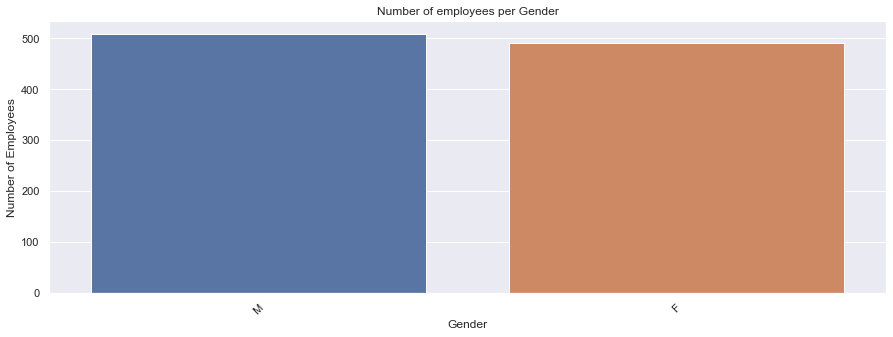

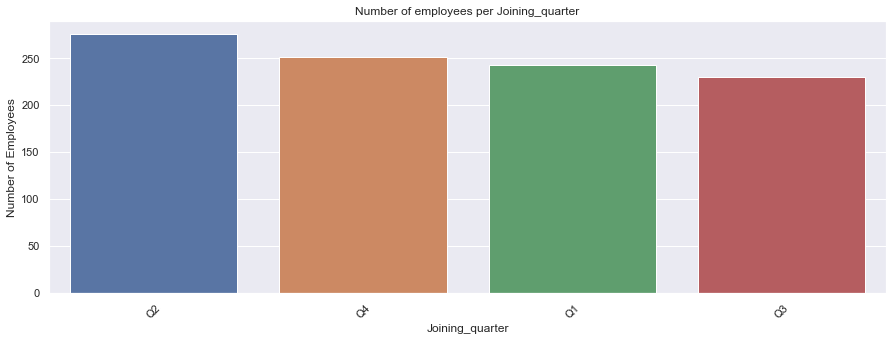

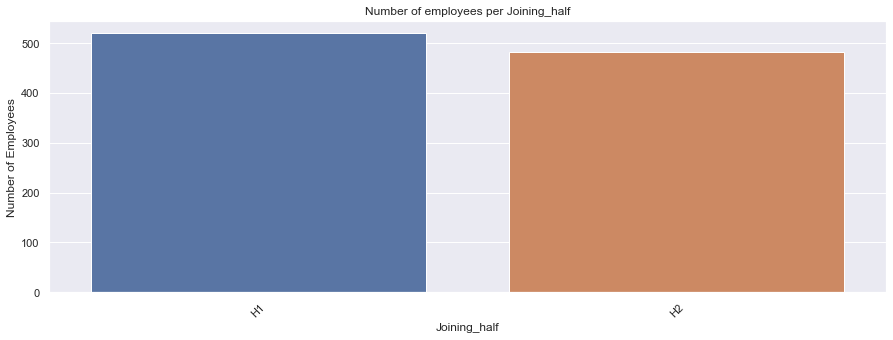

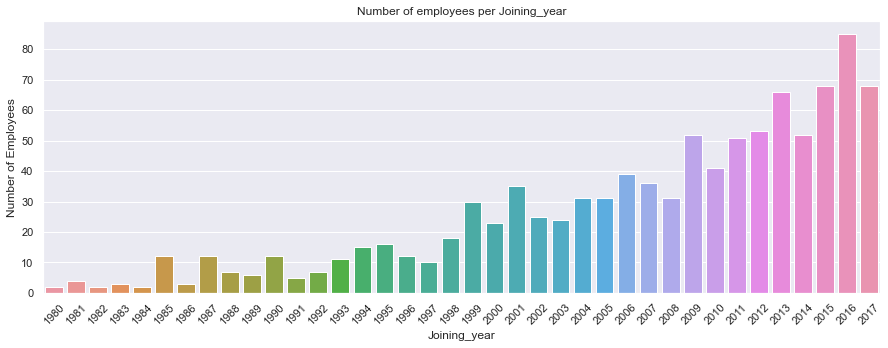

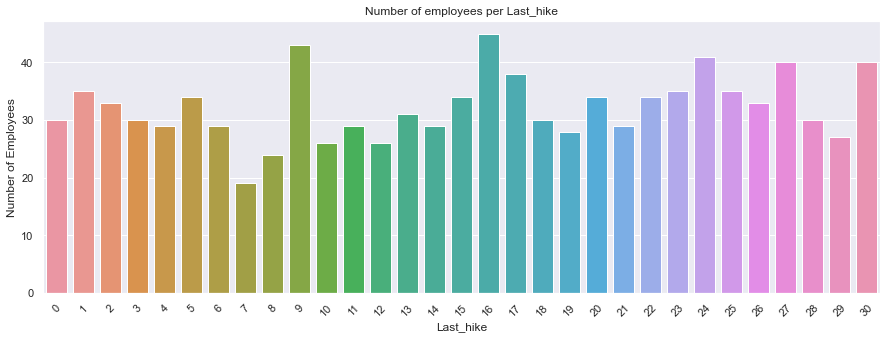

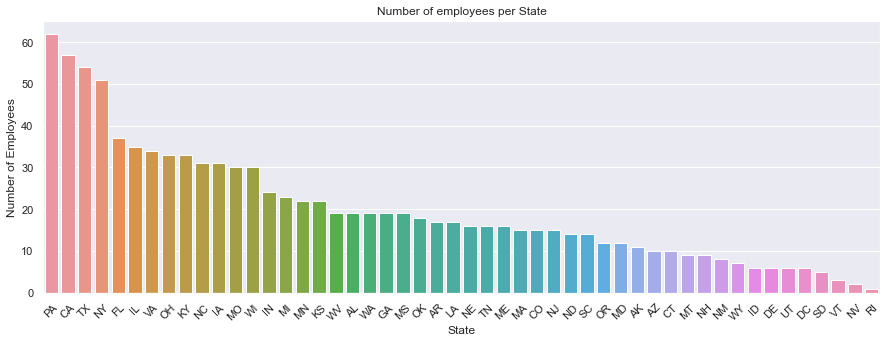

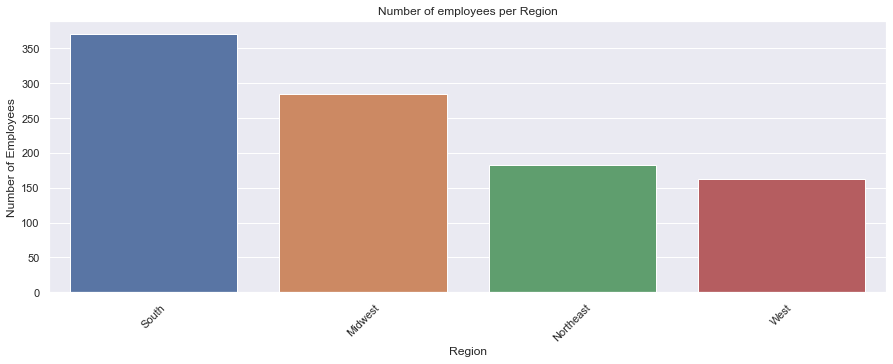

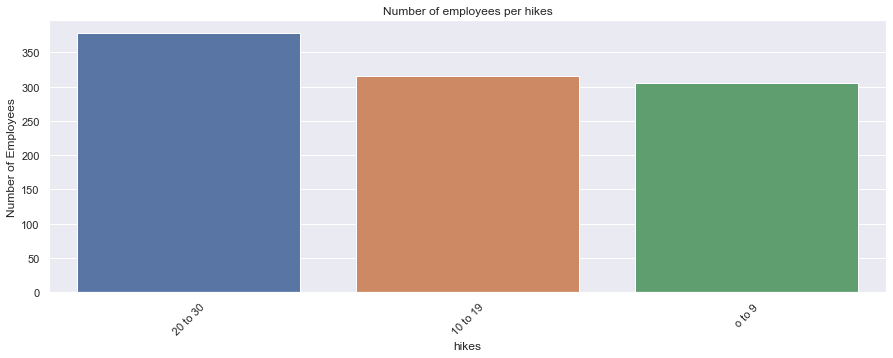

In [145]:
cols = ['Gender', 'Joining_quarter', 'Joining_half', 'Joining_year', 'Last_hike', 'State', 'Region', 'hikes']
for col in cols:
    plt.figure(figsize=(15,5))
    counts = data[col].value_counts()
    sns.barplot(counts.index,counts)
    plt.xlabel(col)
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45)
    plt.title(f"Number of employees per {col}")
    plt.show()

Observations:

1. There are slightly more Male employees than Female employees.
2. Relatively Most number of employees have joined the company in the 2nd Quarter.
3. Relatively the Least number of employees have joined the company in the 3rd Quarter.sq232
4. Most number of employees have joined the company in the 1st half of the years than 2nd half. This reflects our previous observation that Q2 has more number of employees.
5. The number of employees joining the company has grow recently.
6. The company has hired the most number of employees in 2016.
7. 16% was the most percent of hike given to employees last year followed by 20% and 24%. 7% was the least hike given. There is no pattern or evidence showing the reason.
8. Most of the employees are from the State of Pennsylvania(pa) followed by California(ca) and Texas(TX).
9. Most of the employees are from South Region. Number of employees from the West region is comparatively low.
10. Most of the employees are given hike between 20% to 30% last year. 

Numerical variables

In [146]:
def dist_plot(data, col, transformations=['power']):
    
    f, axs = plt.subplots(1, len(transformations)+1, figsize=(15,5))   
    
    sns.distplot(data[[col]], fit=norm,ax=axs[0])
    axs[0].set_title(f'Original "{col}" Distribution')
    axs[0].set_xlabel(col)
    axs[0].axvline(np.mean(data[col]), color='r', linestyle='--')
    axs[0].axvline(np.median(data[col]), color='g', linestyle='-')
    axs[0].legend(['Normal curve','mean','median',col+' distribution curve'],loc='upper right')
    
    for i in range(len(transformations)):
        if transformations[i] == 'power':
            pt =  PowerTransformer(standardize=True)
            data_p = pt.fit_transform(data[[col]])
            axs[i+1].set_title(f'Power Transformed {col} Distribution')
            sns.distplot(data_p, fit=norm, ax=axs[i+1])
            axs[i+1].set_xlabel(f'power({col})')
            axs[i+1].axvline(np.mean(data_p), color='r', linestyle='--')
            axs[i+1].axvline(np.median(data_p), color='g', linestyle='-')
            axs[i+1].legend(['Normal curve','mean','median',col+' Power distribution curve'],loc='upper right')


        if transformations[i] == 'log':
            lt = FunctionTransformer(np.log1p)
            data_l = lt.fit_transform(data[[col]])
            sns.distplot(data_l, fit=norm,ax=axs[i+1])
            axs[i+1].set_title(f'Log1p Transformed {col} Distribution')
            axs[i+1].set_xlabel(f'np.log1p({col})')
            axs[i+1].legend(['Normal curve',col+' log distribution curve'],loc='upper right')


        if transformations[i] == 'sqrt':
            sqrt = FunctionTransformer(np.sqrt)
            data_s = sqrt.fit_transform(data[[col]])
            sns.distplot(data_s, fit=norm,ax=axs[i+1])  
            axs[i+1].set_title(f'SQRT Transformed {col} Distribution')
            axs[i+1].set_xlabel(f'np.sqrt({col})')
            axs[i+1].legend(['Normal curve',col+' square root distribution curve'],loc='upper right')
            
        if transformations[i] == 'square':
            sqrt = FunctionTransformer(np.square)
            data_s = sqrt.fit_transform(data[[col]])
            sns.distplot(data_s, fit=norm,ax=axs[i+1])  
            axs[i+1].set_title(f'Square Transformed {col} Distribution')
            axs[i+1].set_xlabel(f'np.square({col})')
            axs[i+1].legend(['Normal curve',col+' squared distribution curve'],loc='upper right')

    
    
    plt.tight_layout()
    plt.show()

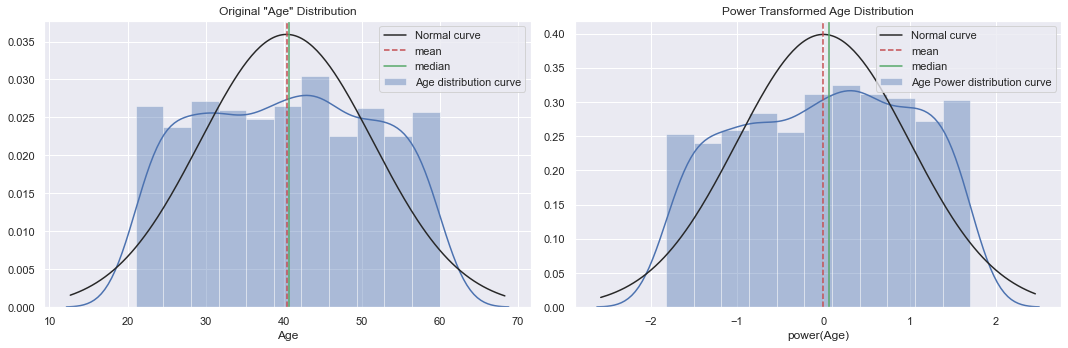

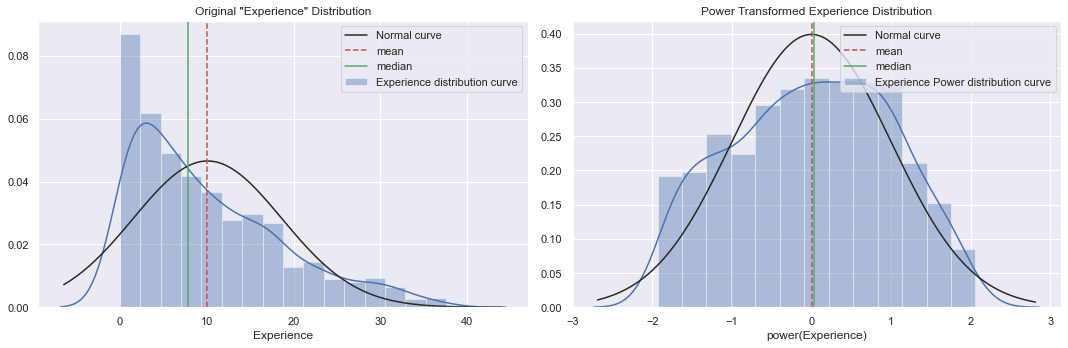

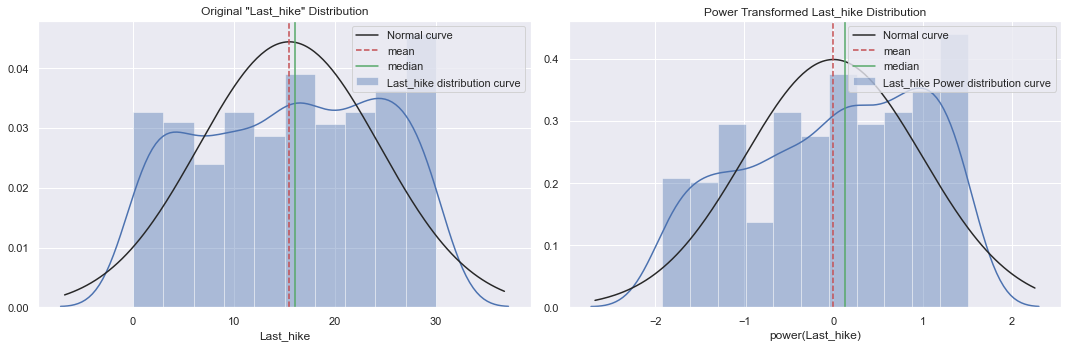

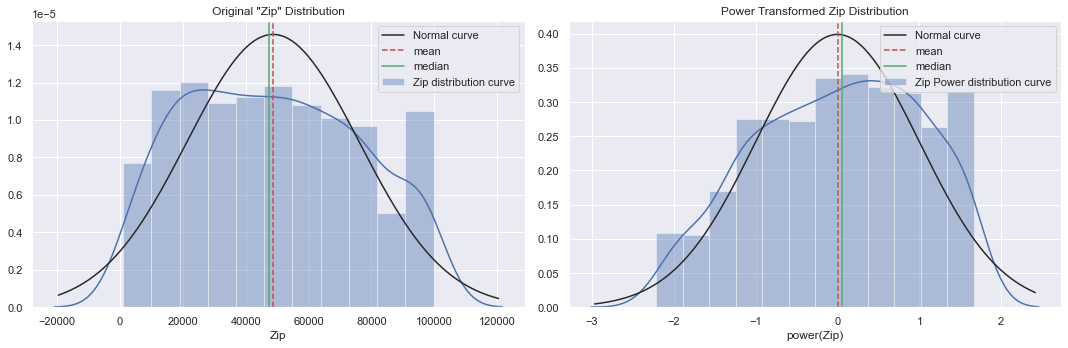

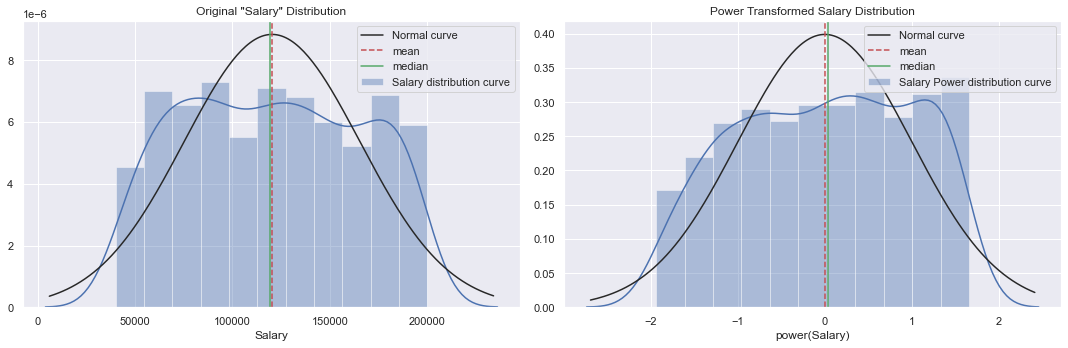

In [147]:
cols = ['Age','Experience', 'Last_hike','Zip','Salary']

for col in cols:
    # the dist_plat can plot Power, log and Sqrt transformations 
    # provide the transformations in the list ['power','log','sqrt']
    dist_plot(data, col, ['power'])

Observations:

1. I have plotted Mean and median to understand visually if the data is skewed
2. The following variables are close to Normal distribution:
    Age, Zip and Salary.
3. The "Experience" variable is right skewed. Power Transformation is able to correct the skewness.
4. Last_hike variable is very slightly left skewed. It will be further investigated.
5. The power transformation does not affect much for the variables that are close to normal distribution. so it might be ok to transform all variable using PowerTransformation instead of just Experience variable if need be.

Further investigating the Skewness

In [148]:
data.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Age,0.006173,-1.157666
Joining_year,-0.958797,0.236806
Experience,0.968211,0.252943
Last_hike,-0.093021,-1.190596
Zip,0.147698,-1.037666
Salary,0.034356,-1.170441


Observations:

1. We can see the 'Experience' and 'Joining_year' are both showing moderate skewness.
2. We can also notice that 'Experience' and 'Joining_year' are almost equally skewed on opposite sides. Another reason to investigate if they are correlated to each other.

In [149]:
data.columns

Index(['Gender', 'Age', 'Joining_quarter', 'Joining_half', 'Joining_year',
       'Experience', 'Last_hike', 'State', 'Zip', 'Region', 'Salary', 'hikes'],
      dtype='object')

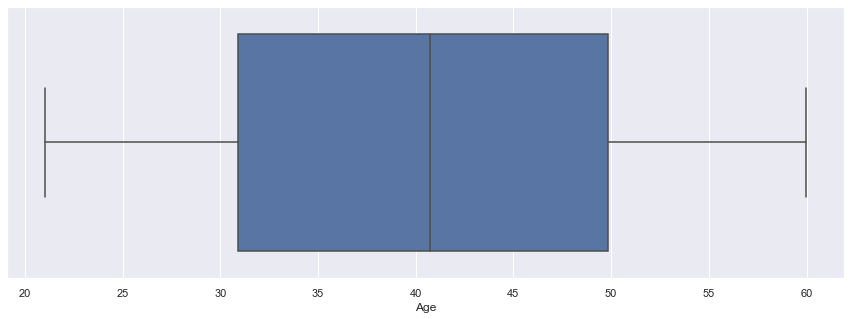

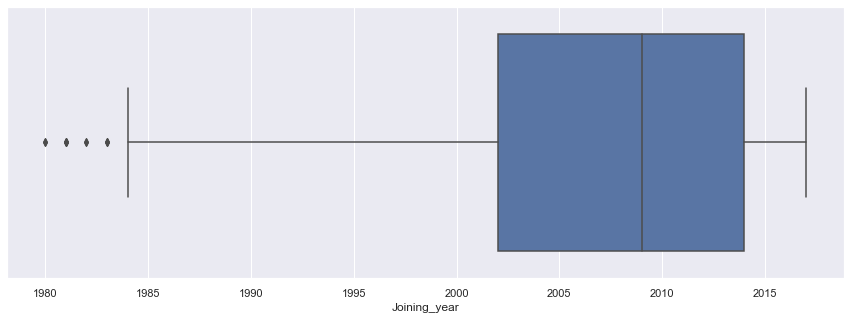

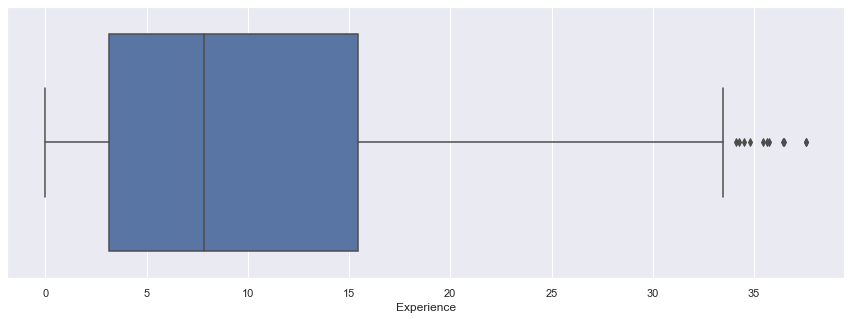

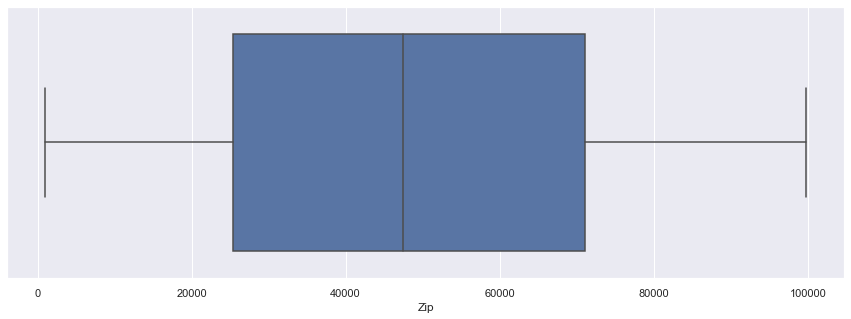

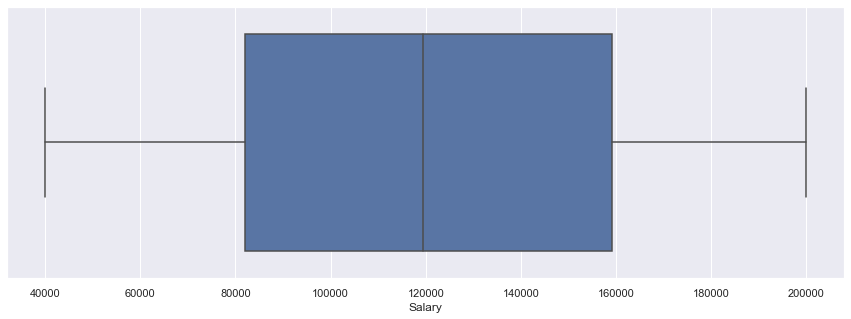

In [150]:
cols = ['Age','Joining_year','Experience','Zip','Salary']
for col in cols:
    sns.boxplot(data[col])
    plt.show()

Observations:

1. There seem to be some outliers in Joining_year. These may be valid data points because it is acceptable that the hiring was very low for the company in the starting stages. This outlier could be because of that. 
2. There are some outliers in the Experience. These outliers could also be valid because it is reasonable to have less number of employees with a very long tenure of work experience.
3. It looks like we dont need to treat the outliers.

This will be further investigated.

### Bivariate analysis

In [151]:
data.columns

Index(['Gender', 'Age', 'Joining_quarter', 'Joining_half', 'Joining_year',
       'Experience', 'Last_hike', 'State', 'Zip', 'Region', 'Salary', 'hikes'],
      dtype='object')

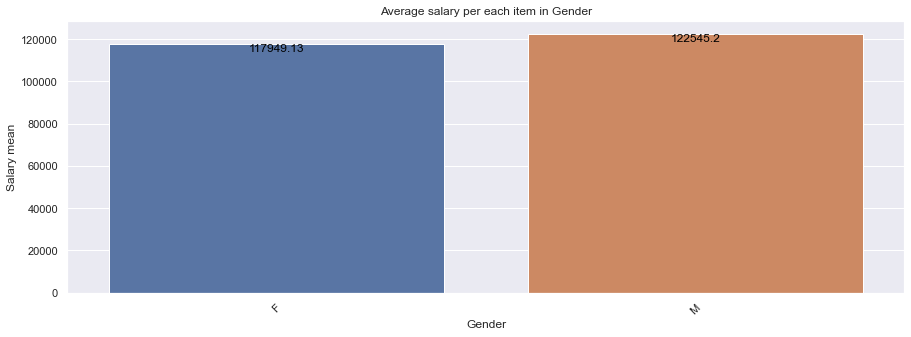

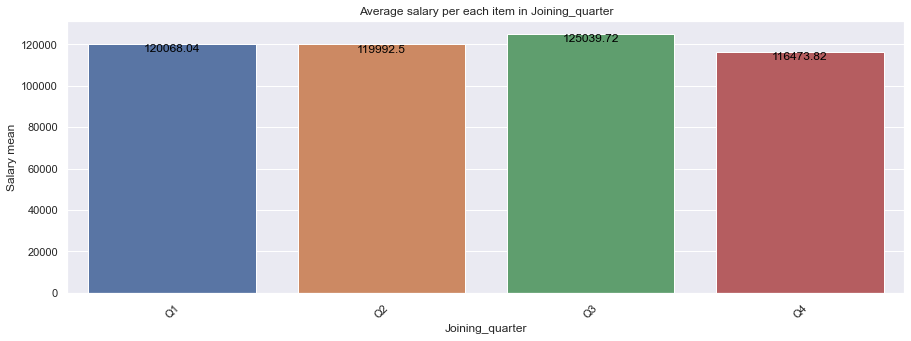

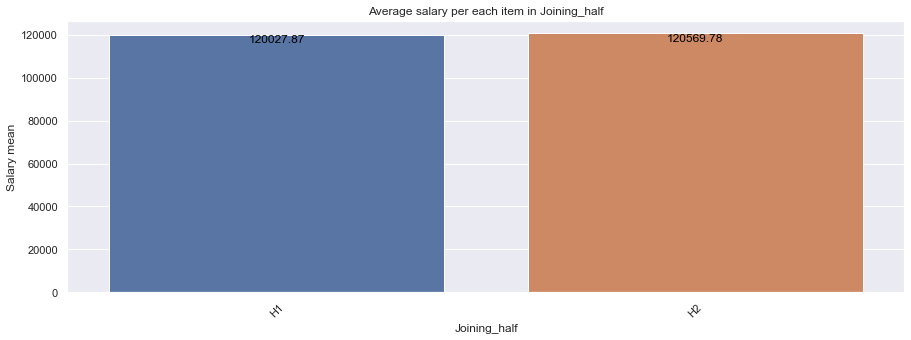

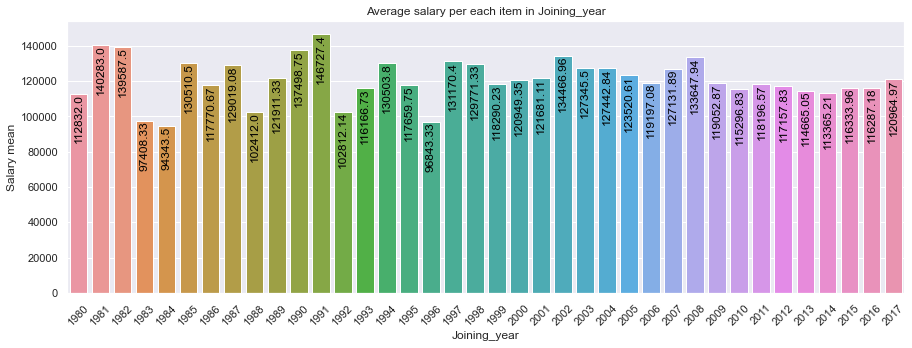

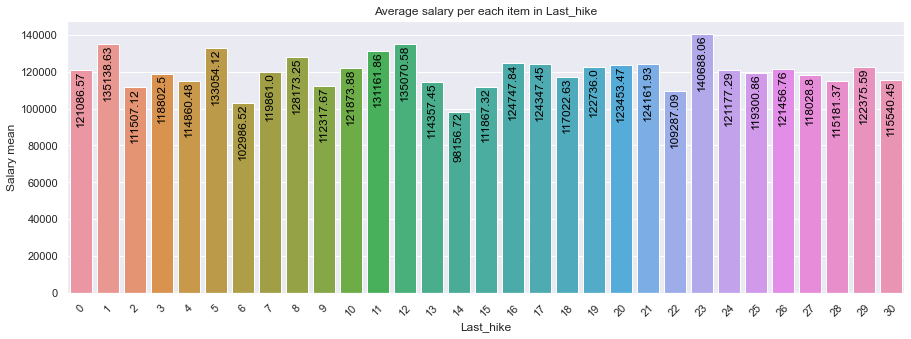

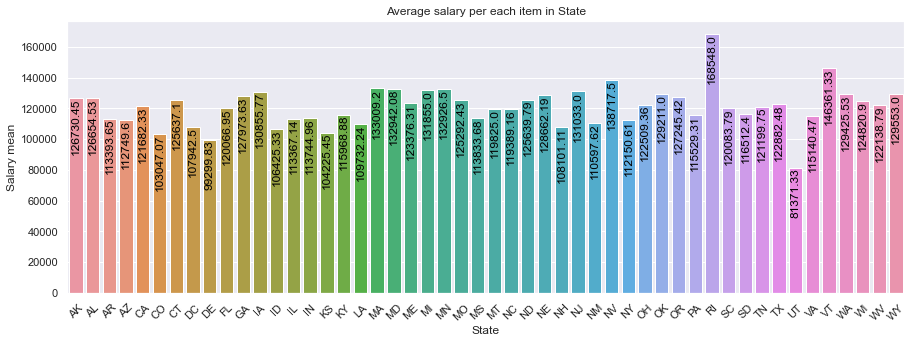

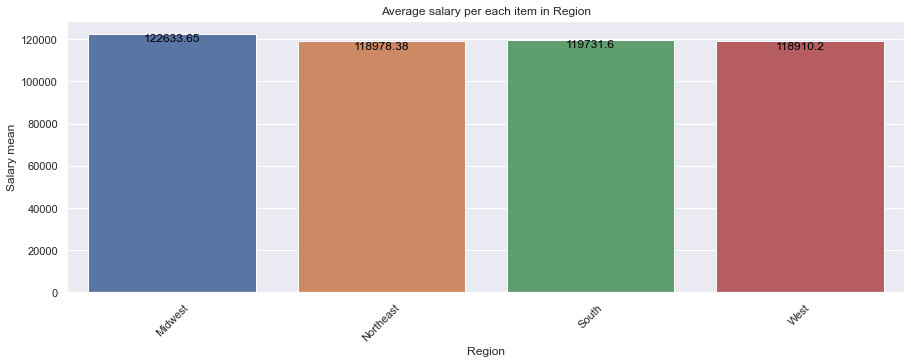

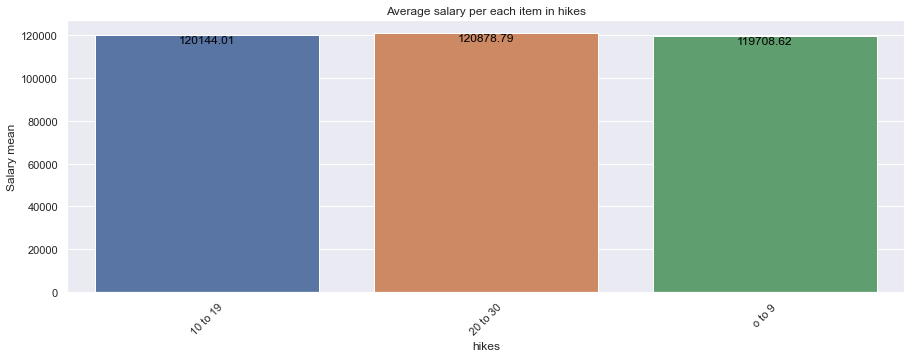

In [152]:
cols = ['Gender', 'Joining_quarter', 'Joining_half', 'Joining_year', 'Last_hike', 'State', 'Region', 'hikes']
for col in cols:
    plt.figure(figsize=(15,5))
    groupedvalues=data.groupby(col).mean().reset_index()
    g=sns.barplot(x=col,y='Salary',data=groupedvalues)
    plt.xlabel(col)
    plt.ylabel(f'Salary mean')
    plt.xticks(rotation=45)
    plt.title(f"Average salary per each item in {col}")
    r = 90 if len(data[col].unique()) > 4 else 0
    for index, row in groupedvalues.iterrows():
        plt.text(x = row.name , y = row['Salary'], s= str(round(row.Salary,2)),fontsize=12,color='black', va="top",ha="center",rotation = r)
                
    plt.show()

Observations:

1. The average salary of the total Male employees is slightly higher than the average salary of the total Female employees. This could be just because there are slightly more male employees in the company as we observed earlier in univariate analysis
2. The average salary of total employees that joined in 3rd Quarters is relatively slightly higher than the the other quarters individualy. Q3 had the 3rd position in the number of employees graph. Which might mean that employees who joined the company in 3rd quarters may get slightly higher salary in relation to the employees joining in oter quarters. This may not be true.
3. Average salary of total employees that joined the company in the 2nd halves shows a very slight positive difference. However the amount is negligible.
4. It looks like most of the high earning employees are those that joined the company in 80s and 90s. I am saying this because we can see that the average salaries are almost equal and higher in some cases while we observed that the number of emplyees that joined the company in 80s and 90s were very low when compared to 2000s. This may mean that the employees that joined the company in 80s and 90s are in very senior positions now.
5. Average salary of employees in Rhode Island is the highest followed by employees in Vermont. It is iteresting that employees from PA, CA and TX did not have the highest average salaries although these states had the top 3 highest number of employees in the company.
6. There is a very mild linear relationship between 'hikes' range and average salary. Employees population that received hikes in the range of '20 to 30' have the highest average salary, followed by '10 to 19' range and the least at '0 to 9' range. The 'hikes' variable looks more intuitive that 'Last_hike'. So Last_hike can be droped

In [153]:
data.drop(['Last_hike'],axis=1,inplace=True)

In [154]:
data.columns

Index(['Gender', 'Age', 'Joining_quarter', 'Joining_half', 'Joining_year',
       'Experience', 'State', 'Zip', 'Region', 'Salary', 'hikes'],
      dtype='object')

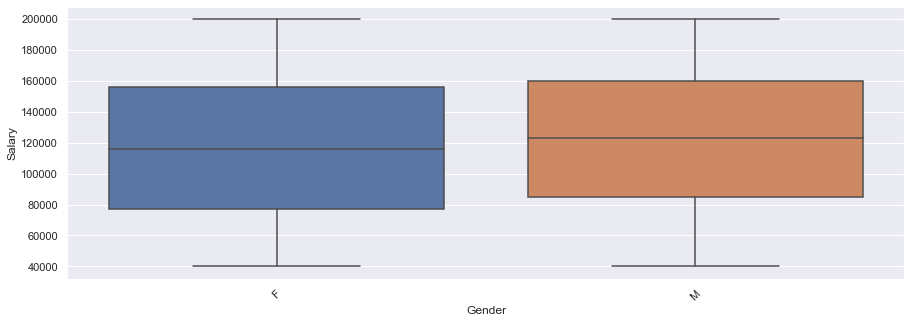

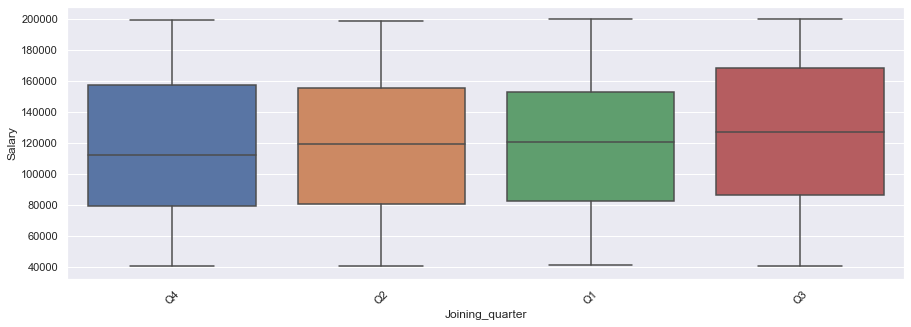

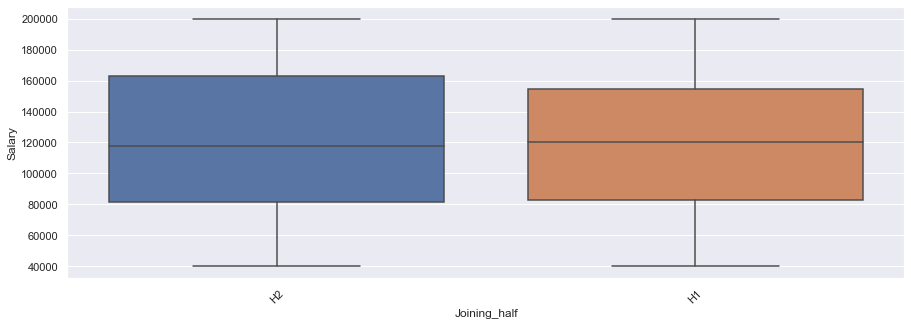

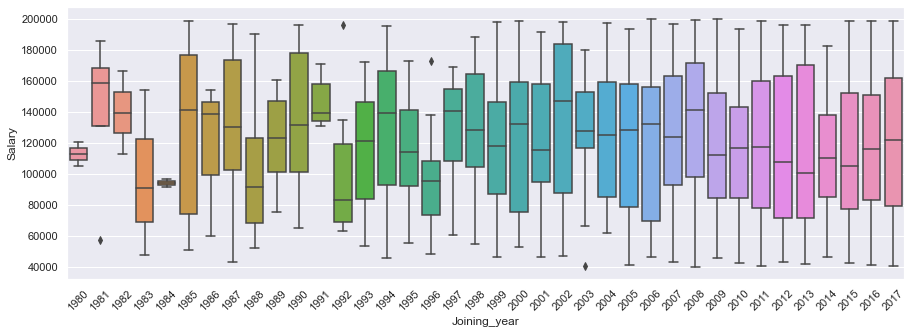

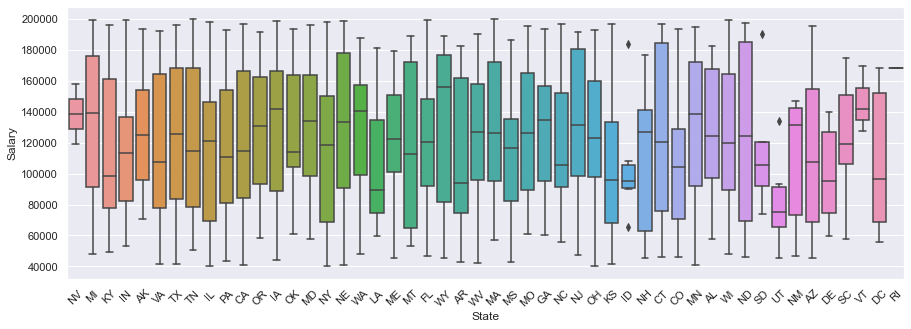

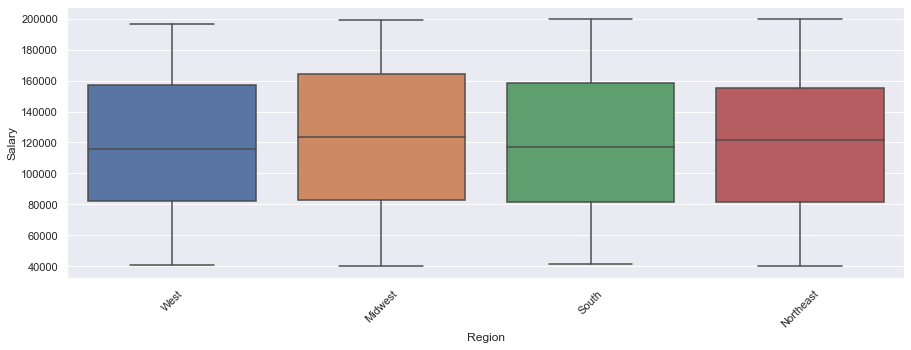

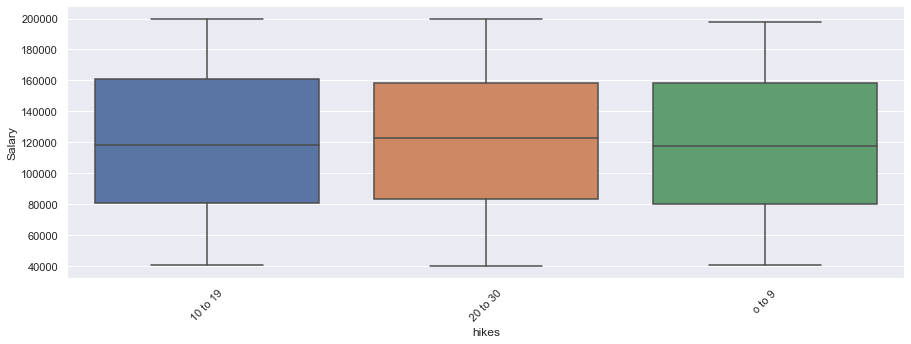

In [155]:
sns.set(rc={"figure.figsize": (15, 5)})
cols = ['Gender','Joining_quarter', 'Joining_half', 'Joining_year','State', 'Region','hikes']
for col in cols:
    plt
    sns.boxplot(data[col],data['Salary'])
    plt.xticks(rotation=45)
    plt.show()

Observations:

1. Pretty much everything we observe here is confirming our previous observations.
2. From the Joining_year graph, we can see that very low number of employees joined the company in 1980, 1984, 1991.
3. From the State graph, we can observe that there are less people from NV, ID VT and RI. Infact from RI it looks like just one employee. We will check that.
4. Infact there is only one employee from RI and that employee is earning a very good salary. -> Gender	M,
Age	38.5,
Joining_quarter	Q2,
Joining_half	H1,
Joining_year	2003,
Experience	14.13,
State	RI,
Zip	2852,
Region	Northeast,
Salary	168548,
hikes	20 to 30


In [156]:
data[data['State']=='RI']

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,State,Zip,Region,Salary,hikes
940,M,38.5,Q2,H1,2003,14.13,RI,2852,Northeast,168548,20 to 30


### Multivariate analysis

In [157]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

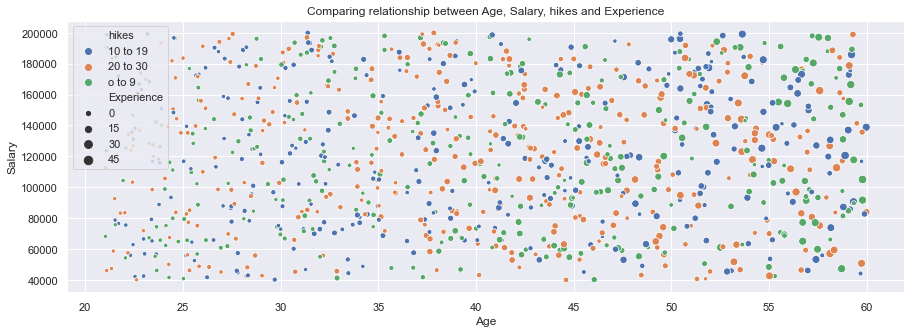

In [158]:
plt.title(f'Comparing relationship between Age, Salary, hikes and Experience')
sns.scatterplot(data['Age'], data['Salary'],hue = data['hikes'], size = data['Experience'])
plt.show()

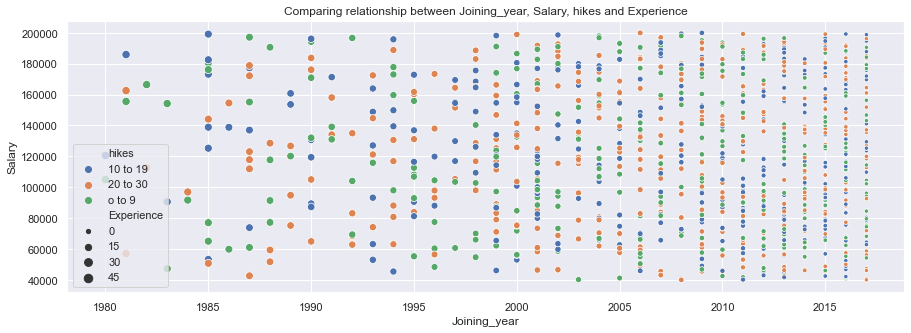

In [159]:
plt.title(f'Comparing relationship between Joining_year, Salary, hikes and Experience')
sns.scatterplot(data['Joining_year'], data['Salary'],hue = data['hikes'], size = data['Experience'])
plt.show()

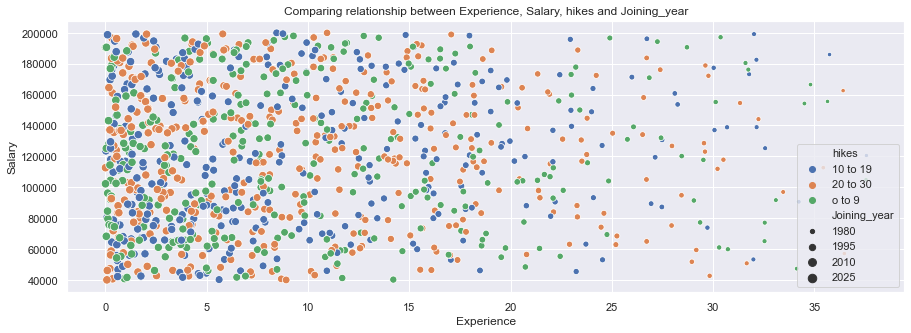

In [160]:
plt.title(f'Comparing relationship between Experience, Salary, hikes and Joining_year')
sns.scatterplot(data['Experience'], data['Salary'],hue = data['hikes'], size = data['Joining_year'])
plt.show()

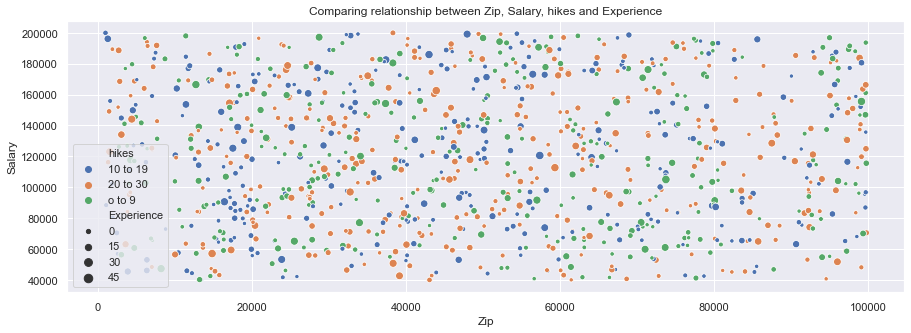

In [161]:
plt.title(f'Comparing relationship between Zip, Salary, hikes and Experience')
sns.scatterplot(data['Zip'], data['Salary'],hue = data['hikes'], size = data['Experience'])
plt.show()

Observations:

1. From the above graphs we can see that there is no linear pattern between the data. However we can observe that there are some complex clusters available when we combine different features together. We should be able to use KNN, Tree based algorithms or ensemble techniques for this dataset.
2. Since Zip also gives location information and since it does not give any clear pattern, I am dropping that feature. We already have State and Region denoting locations.

In [162]:
data.drop(['Zip'],axis=1,inplace=True)

In [163]:
pd.pivot_table(data, index = ['Region','Gender'], values = 'Salary')

Salary
Region    Gender               
Midwest   F       119175.055944
          M       126116.591549
Northeast F       117912.528736
          M       119954.473684
South     F       117459.934524
          M       121611.591133
West      F       116982.043011
          M       121509.014493

Observations:

We can see that in all regions, Male employees have higher salary mean than Female employees.

In [164]:
data.columns

Index(['Gender', 'Age', 'Joining_quarter', 'Joining_half', 'Joining_year',
       'Experience', 'State', 'Region', 'Salary', 'hikes'],
      dtype='object')

In [165]:
pd.pivot_table(data, index = ['Region','State'], values = 'Salary')

Salary
Region    State               
Midwest   IA     130855.774194
          IL     113367.142857
          IN     113744.958333
          KS     104225.454545
          MI     131855.000000
          MN     132926.500000
          MO     125292.433333
          ND     125639.785714
          NE     128662.187500
          OH     122509.363636
          SD     116512.400000
          WI     124820.900000
Northeast CT     125637.100000
          MA     133009.200000
          ME     123376.312500
          NH     108101.111111
          NJ     131033.000000
          NY     112150.607843
          PA     115529.306452
          RI     168548.000000
          VT     146361.333333
South     AL     126654.526316
          AR     113393.647059
          DC     107942.500000
          DE      99299.833333
          FL     120066.945946
          GA     127973.631579
          KY     115968.878788
          LA     109732.235294
          MD     132942.083333
          MS     113833.684211
          NC     119389.161290
          OK     129211.000000
          SC     120083.785714
          TN     121199.750000
          TX     122882.481481
          VA     115140.470588
          WV     122138.789474
West      AK     126730.454545
          AZ     112749.600000
          CA     121682.333333
          CO     103047.066667
          ID     106425.333333
          MT     119825.000000
          NM     110597.625000
          NV     138717.500000
          OR     127245.416667
          UT      81371.333333
          WA     129425.526316
          WY     129553.000000

In [166]:
pd.pivot_table(data, index = ['Joining_year','Joining_half','Joining_quarter'], values = 'Salary')

Salary
Joining_year Joining_half Joining_quarter               
1980         H1           Q1               112832.000000
1981         H1           Q1               109836.000000
             H2           Q4               170730.000000
1982         H1           Q1               112711.000000
             H2           Q4               166464.000000
1983         H1           Q1               154216.000000
                          Q2                69004.500000
1984         H1           Q1                96974.000000
                          Q2                91713.000000
1985         H1           Q1                89176.000000
                          Q2               155175.333333
             H2           Q3               126222.000000
                          Q4               145157.000000
1986         H1           Q2               154559.000000
             H2           Q4                99376.500000
1987         H1           Q1               157488.500000
                          Q2               109407.000000
             H2           Q3               157175.500000
                          Q4               118136.000000
1988         H1           Q1               107858.000000
                          Q2                59439.000000
             H2           Q3                71627.500000
                          Q4               190616.000000
1989         H1           Q1               107523.000000
                          Q2               157201.500000
             H2           Q3               101009.500000
1990         H1           Q1               131528.000000
                          Q2               156847.000000
             H2           Q3               130166.000000
                          Q4               137461.750000
1991         H1           Q1               146092.500000
             H2           Q3               155209.500000
                          Q4               131033.000000
1992         H1           Q2                65696.000000
             H2           Q3               165804.500000
                          Q4                85561.333333
1993         H1           Q1                84781.333333
                          Q2               172421.000000
             H2           Q3               135353.333333
                          Q4               111252.250000
1994         H1           Q1               132513.666667
                          Q2               116218.200000
             H2           Q3               146817.000000
                          Q4                98023.000000
1995         H1           Q1               128816.250000
                          Q2                99344.800000
             H2           Q3               120113.400000
                          Q4               135000.000000
1996         H1           Q1                83850.333333
                          Q2               138950.000000
             H2           Q3               138006.000000
                          Q4                82443.833333
1997         H1           Q1               140435.666667
                          Q2               125008.333333
             H2           Q3               142589.500000
                          Q4               115096.500000
1998         H1           Q1               125314.142857
             H2           Q3               148950.800000
                          Q4               118988.500000
1999         H1           Q1                89908.800000
                          Q2               137467.000000
             H2           Q3               145602.400000
                          Q4                95446.000000
2000         H1           Q1               104753.166667
                          Q2               136441.000000
             H2           Q3                87875.400000
                          Q4               151770.400000
2001         H1           Q1               124683.857143
                          Q2               103795.333333
   

Observations: All the observations are suggesting that the dataset is defined by a complex function.

### Correlations:

Looking at linear correlation between the numerical variables and the target(Salary) variable

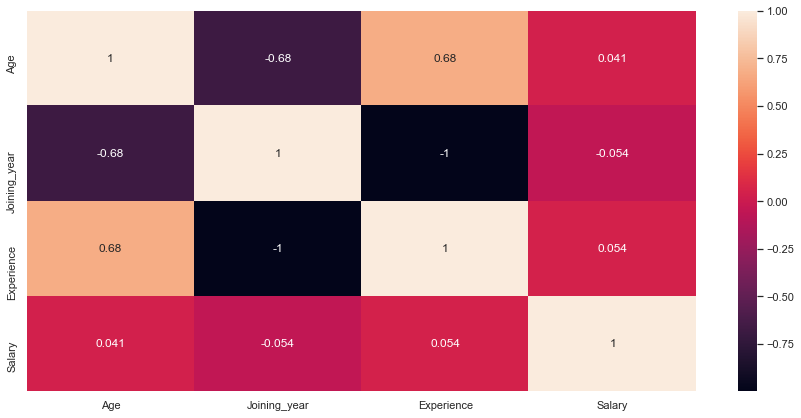

In [172]:
plt.figure(figsize=(15,7))
corr= data.corr()
sns.heatmap(corr, annot = True)

Observations:

1. The linear correlation between each feature to the target(Salary) variable is very low.
2. Age and Experience have positive correlation with Salary even though its low.
3. Joining_year has a negative correlation with Salary even though its low.
4. Age, Joining_year and Experience have an extremely strong correlation with each other as expected. This can lead to Multicollinearity problem.
5. Since Multicollinearty can cause issues in the model, I am dropping Age and Joining_year and will be keeping Experience since it has comparatively higher correlation with Salary.

In [173]:
data.drop(['Joining_year','Age'], axis=1, inplace = True)

Lets look at linear correlation between the categorical variables and the target(Salary) variable.

In [175]:
data.columns

Index(['Gender', 'Joining_quarter', 'Joining_half', 'Experience', 'State',
       'Region', 'Salary', 'hikes'],
      dtype='object')

In [167]:
from sklearn.linear_model import LogisticRegression

In [184]:
importance = []
for col in ['Gender','Joining_quarter', 'Joining_half','hikes','State', 'Region']:
    X= data[['Salary']]
    y = data[col]
    lr = LogisticRegression()
    lr.fit(X,y)
    importance = lr.coef_[0]
    print(f'Score for {col} is : {lr.score(X,y)}')
    #print('Importance',lr.coef_)

Score for Gender is : 0.509
Score for Joining_quarter is : 0.276
Score for Joining_half is : 0.519
Score for hikes is : 0.378
Score for State is : 0.062
Score for Region is : 0.371


Observations:

From the above scores we can understand that the variable 'Salary' is not able to distinguish between the different categories in ['Gender','Joining_quarter', 'Joining_half','hikes','State', 'Region'] categorical variables.

Hence we can conclude that there is not enough linear correlation between the categorical variables and our target(Salary) variable.

From the above observations of correlations, we can conclude that linear models are not going to be much helpful here.

### Categorical Feature encoding and Data Transformation

In [186]:
data.columns

Index(['Gender', 'Joining_quarter', 'Joining_half', 'Experience', 'State',
       'Region', 'Salary', 'hikes'],
      dtype='object')

1. We have the following categorical variables: Gender, Joining_quarter, Joinging_half, State, hikes and Region
2. Since 'hikes' variable shows a ranking nature,(0to9 < 10to19 < 20to30) we can go for 'Label Encoding' or 'Direct assignment of values' for hikes. This is because Label encoding assigns 0,1,2,3,etc which the model can understand as a ranking values(one is greater than the other)
3. Since the variables Gender, Joining_quarter, Joinging_half, State and Region are not ranking in nature, Ill go with OneHotEncoding for these.

In [ ]:
#Since LabelEncoder assigns values based on First come First serve basis and we need ranking in the order (0to9 < 10to19 < 20to30),
#its better to manually assign the encoding values
data['hike_encoded'] = data['hikes'].apply(lambda x : 1 if x == '0 to 9' else (2 if x == '10 to 19' else 3))

In [198]:
#droping hikes
data.drop(['hikes'],axis=1,inplace=True)

In [205]:
from sklearn.preprocessing import OneHotEncoder
enc_data = pd.get_dummies(data, drop_first = True)
enc_data.head()

,Experience,Salary,hike_encoded,Gender_M,Joining_quarter_Q2,Joining_quarter_Q3,Joining_quarter_Q4,Joining_half_H2,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Region_Northeast,Region_South,Region_West
0,6.61,119090,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.26,117991,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.34,161045,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,14.43,142616,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.79,135706,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [222]:
trans_data_fi = enc_data.copy()
trans_data_fi.head()

,Experience,Salary,hike_encoded,Gender_M,Joining_quarter_Q2,Joining_quarter_Q3,Joining_quarter_Q4,Joining_half_H2,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Region_Northeast,Region_South,Region_West
0,6.61,119090,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.26,117991,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.34,161045,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,14.43,142616,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.79,135706,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Data Transformation:

Only the Experience variable was right skewed. PowerTransforming the Experience variable

In [224]:

pt = PowerTransformer()
trans_data_fi['Experience'] = pt.fit_transform(trans_data_fi[['Experience']])
trans_data_fi.head()

,Experience,Salary,hike_encoded,Gender_M,Joining_quarter_Q2,Joining_quarter_Q3,Joining_quarter_Q4,Joining_half_H2,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Region_Northeast,Region_South,Region_West
0,-0.131519,119090,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-1.769492,117991,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.723942,161045,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.723117,142616,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.500786,135706,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Data Transformation

Only the Experience variable was right skewed. PowerTransforming the Experience variable

In [297]:
enc_data_pt = enc_data.copy()
pt = PowerTransformer()
enc_data_pt['Experience'] = pt.fit_transform(enc_data_pt[['Experience']])
X_pt = enc_data_pt[['Experience', 'hike_encoded','Gender_M']]
y_pt = enc_data_pt['Salary']

X_p = enc_data.drop(['Salary'], axis=1)
y_p = enc_data['Salary']

### Splitting Train and Test data

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [298]:
best_rstate = 0
accu = 0

for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(X_p, y_p, test_size = 0.30, random_state = i)
    
    model = DecisionTreeRegressor()
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    temp_accu = r2_score(y_test, y_preds)
    if temp_accu > accu:
        accu = temp_accu
        best_rstate = i
        
print(f'The best accuracy {accu} is found using Random state {best_rstate}')
    
    
    

The best accuracy 0 is found using Random state 0


In [300]:
x_train, x_test, y_train, y_test = train_test_split(X_p, y_p, test_size = 0.30, random_state = 0)
model = KNeighborsRegressor()
model.fit(x_train, y_train)
y_preds = model.predict(x_test)
r2_score(y_test, y_preds)

-0.25883120935855297

### Feature Importance

Model score: 0.9986450951528034
Feature: Experience, Score: 0.40299
Feature: hike_encoded, Score: 0.02505
Feature: Gender_M, Score: 0.04734
Feature: Joining_quarter_Q2, Score: 0.01558
Feature: Joining_quarter_Q3, Score: 0.01306
Feature: Joining_quarter_Q4, Score: 0.01411
Feature: Joining_half_H2, Score: 0.01719
Feature: State_AL, Score: 0.00399
Feature: State_AR, Score: 0.00962
Feature: State_AZ, Score: 0.00430
Feature: State_CA, Score: 0.01363
Feature: State_CO, Score: 0.00582
Feature: State_CT, Score: 0.00945
Feature: State_DC, Score: 0.00779
Feature: State_DE, Score: 0.00055
Feature: State_FL, Score: 0.01329
Feature: State_GA, Score: 0.01405
Feature: State_IA, Score: 0.00676
Feature: State_ID, Score: 0.00000
Feature: State_IL, Score: 0.01337
Feature: State_IN, Score: 0.00862
Feature: State_KS, Score: 0.01248
Feature: State_KY, Score: 0.00517
Feature: State_LA, Score: 0.00820
Feature: State_MA, Score: 0.00927
Feature: State_MD, Score: 0.00517
Feature: State_ME, Score: 0.00912
Feature

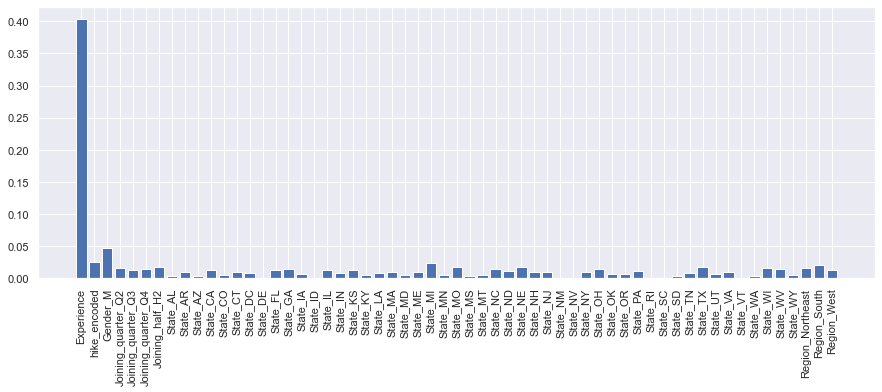

In [267]:
from sklearn.tree import DecisionTreeRegressor
X_fi = trans_data_fi.drop(['Salary'], axis=1)
y_fi = enc_data['Salary']

model = DecisionTreeRegressor()
model.fit(X_fi, y_fi)
print(f"Model score: {model.score(X_fi, y_fi)}")
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X_fi.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks = np.arange(X_fi.shape[1]), labels=X_fi.columns, rotation=90)
plt.show()

In [ ]:
trans_data_fi.columns
trans_data_fi[['Experience', 'Salary', 'hike_encoded', 'Gender_M',
       'Joining_quarter_Q2', 'Joining_quarter_Q3', 'Joining_quarter_Q4',
       'Joining_half_H2','Region_Northeast', 'Region_South',
       'Region_West']]


Model score: 0.8590351340828642
Feature: Experience, Score: 0.01637
Feature: hike_encoded, Score: 0.01543
Feature: Gender_M, Score: 0.01385
Feature: Joining_quarter_Q2, Score: 0.01352
Feature: Joining_quarter_Q3, Score: 0.02271
Feature: Joining_quarter_Q4, Score: 0.01819
Feature: Joining_half_H2, Score: 0.02355
Feature: State_AL, Score: 0.01739
Feature: State_AR, Score: 0.02689
Feature: State_AZ, Score: 0.02978
Feature: State_CA, Score: 0.02153
Feature: State_CO, Score: 0.01612
Feature: State_CT, Score: 0.03530
Feature: State_DC, Score: 0.01548
Feature: State_DE, Score: 0.00600
Feature: State_FL, Score: 0.01464
Feature: State_GA, Score: 0.01585
Feature: State_IA, Score: 0.01939
Feature: State_ID, Score: 0.01855
Feature: State_IL, Score: 0.01268
Feature: State_IN, Score: 0.01000
Feature: State_KS, Score: 0.02199
Feature: State_KY, Score: 0.02139
Feature: State_LA, Score: 0.02243
Feature: State_MA, Score: 0.00912
Feature: State_MD, Score: 0.01006
Feature: State_ME, Score: 0.00951
Feature

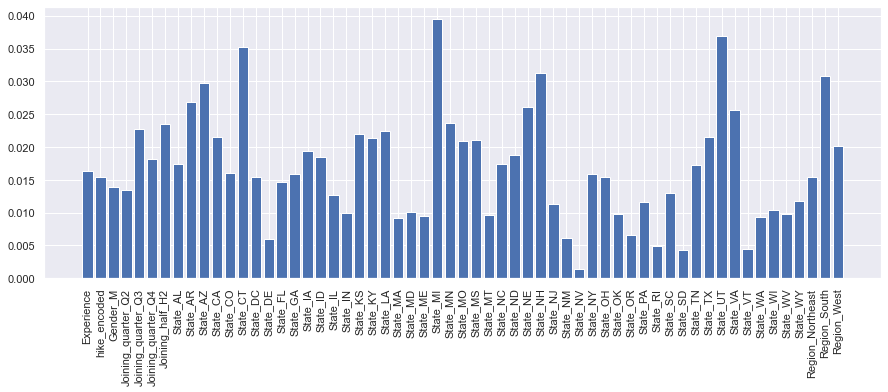

In [268]:
from xgboost import XGBRegressor

X_fi = trans_data_fi.drop(['Salary'], axis=1)
y_fi = trans_data_fi['Salary']

model = XGBRegressor()
model.fit(X_fi, y_fi)
print(f"Model score: {model.score(X_fi, y_fi)}")
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X_fi.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks = np.arange(X_fi.shape[1]), labels=X_fi.columns, rotation=90)
plt.show()